In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import os
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

import math


from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

import warnings
warnings.filterwarnings('ignore')

pd.options.display.max_columns = None

#01 - Problem (case study)
#we want to analyse our dataframe and checking if they are ok or not ok

02 - Getting Data

In [2]:
data = pd.read_csv('marketing_customer_analysis.csv')
data.head()

Customer       State  Customer Lifetime Value Response  Coverage Education  \
0  BU79786  Washington              2763.519279       No     Basic  Bachelor   
1  QZ44356     Arizona              6979.535903       No  Extended  Bachelor   
2  AI49188      Nevada             12887.431650       No   Premium  Bachelor   
3  WW63253  California              7645.861827       No     Basic  Bachelor   
4  HB64268  Washington              2813.692575       No     Basic  Bachelor   

  Effective To Date EmploymentStatus Gender  Income Location Code  \
0           2/24/11         Employed      F   56274      Suburban   
1           1/31/11       Unemployed      F       0      Suburban   
2           2/19/11         Employed      F   48767      Suburban   
3           1/20/11       Unemployed      M       0      Suburban   
4            2/3/11         Employed      M   43836         Rural   

  Marital Status  Monthly Premium Auto  Months Since Last Claim  \
0        Married                    69                       32   
1         Single                    94                       13   
2        Married                   108                       18   
3        Married                   106                       18   
4         Single                    73                       12   

   Months Since Policy Inception  Number of Open Complaints  \
0                              5                          0   
1                             42                          0   
2                             38                          0   
3                             65                          0   
4                             44                          0   

   Number of Policies     Policy Type        Policy Renew Offer Type  \
0                   1  Corporate Auto  Corporate L3           Offer1   
1                   8   Personal Auto   Personal L3           Offer3   
2                   2   Personal Auto   Personal L3           Offer1   
3                   7  Corporate Auto  Corporate L2           Offer1   
4                   1   Personal Auto   Personal L1           Offer1   

  Sales Channel  Total Claim Amount  Vehicle Class Vehicle Size  
0         Agent          384.811147   Two-Door Car      Medsize  
1         Agent         1131.464935  Four-Door Car      Medsize  
2         Agent          566.472247   Two-Door Car      Medsize  
3   Call Center          529.881344            SUV      Medsize  
4         Agent          138.130879  Four-Door Car      Medsize

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer                       9134 non-null   object 
 1   State                          9134 non-null   object 
 2   Customer Lifetime Value        9134 non-null   float64
 3   Response                       9134 non-null   object 
 4   Coverage                       9134 non-null   object 
 5   Education                      9134 non-null   object 
 6   Effective To Date              9134 non-null   object 
 7   EmploymentStatus               9134 non-null   object 
 8   Gender                         9134 non-null   object 
 9   Income                         9134 non-null   int64  
 10  Location Code                  9134 non-null   object 
 11  Marital Status                 9134 non-null   object 
 12  Monthly Premium Auto           9134 non-null   i

03 - Cleaning/Wrangling/EDA

In [4]:
data.drop_duplicates()

Customer       State  Customer Lifetime Value Response  Coverage  \
0     BU79786  Washington              2763.519279       No     Basic   
1     QZ44356     Arizona              6979.535903       No  Extended   
2     AI49188      Nevada             12887.431650       No   Premium   
3     WW63253  California              7645.861827       No     Basic   
4     HB64268  Washington              2813.692575       No     Basic   
...       ...         ...                      ...      ...       ...   
9129  LA72316  California             23405.987980       No     Basic   
9130  PK87824  California              3096.511217      Yes  Extended   
9131  TD14365  California              8163.890428       No  Extended   
9132  UP19263  California              7524.442436       No  Extended   
9133  Y167826  California              2611.836866       No  Extended   

     Education Effective To Date EmploymentStatus Gender  Income  \
0     Bachelor           2/24/11         Employed      F   56274   
1     Bachelor           1/31/11       Unemployed      F       0   
2     Bachelor           2/19/11         Employed      F   48767   
3     Bachelor           1/20/11       Unemployed      M       0   
4     Bachelor            2/3/11         Employed      M   43836   
...        ...               ...              ...    ...     ...   
9129  Bachelor           2/10/11         Employed      M   71941   
9130   College           2/12/11         Employed      F   21604   
9131  Bachelor            2/6/11       Unemployed      M       0   
9132   College            2/3/11         Employed      M   21941   
9133   College           2/14/11       Unemployed      M       0   

     Location Code Marital Status  Monthly Premium Auto  \
0         Suburban        Married                    69   
1         Suburban         Single                    94   
2         Suburban        Married                   108   
3         Suburban        Married                   106   
4            Rural         Single                    73   
...            ...            ...                   ...   
9129         Urban        Married                    73   
9130      Suburban       Divorced                    79   
9131      Suburban         Single                    85   
9132      Suburban        Married                    96   
9133      Suburban         Single                    77   

      Months Since Last Claim  Months Since Policy Inception  \
0                          32                              5   
1                          13                             42   
2                          18                             38   
3                          18                             65   
4                          12                             44   
...                       ...                            ...   
9129                       18                             89   
9130                       14                             28   
9131                        9                             37   
9132                       34                              3   
9133                        3                             90   

      Number of Open Complaints  Number of Policies     Policy Type  \
0                             0                   1  Corporate Auto   
1                             0                   8   Personal Auto   
2                             0                   2   Personal Auto   
3                             0                   7  Corporate Auto   
4                             0                   1   Personal Auto   
...                         ...                 ...             ...   
9129                          0                   2   Personal Auto   
9130                          0                   1  Corporate Auto   
9131                          3                   2  Corporate Auto   
9132                          0                   3   Personal Auto   
9133                          0                   1 

In [5]:
data.columns

Index(['Customer', 'State', 'Customer Lifetime Value', 'Response', 'Coverage',
       'Education', 'Effective To Date', 'EmploymentStatus', 'Gender',
       'Income', 'Location Code', 'Marital Status', 'Monthly Premium Auto',
       'Months Since Last Claim', 'Months Since Policy Inception',
       'Number of Open Complaints', 'Number of Policies', 'Policy Type',
       'Policy', 'Renew Offer Type', 'Sales Channel', 'Total Claim Amount',
       'Vehicle Class', 'Vehicle Size'],
      dtype='object')

In [6]:
data.columns = [column.lower().replace(' ', '_') for column in data.columns] 

In [7]:
data

customer       state  customer_lifetime_value response  coverage  \
0     BU79786  Washington              2763.519279       No     Basic   
1     QZ44356     Arizona              6979.535903       No  Extended   
2     AI49188      Nevada             12887.431650       No   Premium   
3     WW63253  California              7645.861827       No     Basic   
4     HB64268  Washington              2813.692575       No     Basic   
...       ...         ...                      ...      ...       ...   
9129  LA72316  California             23405.987980       No     Basic   
9130  PK87824  California              3096.511217      Yes  Extended   
9131  TD14365  California              8163.890428       No  Extended   
9132  UP19263  California              7524.442436       No  Extended   
9133  Y167826  California              2611.836866       No  Extended   

     education effective_to_date employmentstatus gender  income  \
0     Bachelor           2/24/11         Employed      F   56274   
1     Bachelor           1/31/11       Unemployed      F       0   
2     Bachelor           2/19/11         Employed      F   48767   
3     Bachelor           1/20/11       Unemployed      M       0   
4     Bachelor            2/3/11         Employed      M   43836   
...        ...               ...              ...    ...     ...   
9129  Bachelor           2/10/11         Employed      M   71941   
9130   College           2/12/11         Employed      F   21604   
9131  Bachelor            2/6/11       Unemployed      M       0   
9132   College            2/3/11         Employed      M   21941   
9133   College           2/14/11       Unemployed      M       0   

     location_code marital_status  monthly_premium_auto  \
0         Suburban        Married                    69   
1         Suburban         Single                    94   
2         Suburban        Married                   108   
3         Suburban        Married                   106   
4            Rural         Single                    73   
...            ...            ...                   ...   
9129         Urban        Married                    73   
9130      Suburban       Divorced                    79   
9131      Suburban         Single                    85   
9132      Suburban        Married                    96   
9133      Suburban         Single                    77   

      months_since_last_claim  months_since_policy_inception  \
0                          32                              5   
1                          13                             42   
2                          18                             38   
3                          18                             65   
4                          12                             44   
...                       ...                            ...   
9129                       18                             89   
9130                       14                             28   
9131                        9                             37   
9132                       34                              3   
9133                        3                             90   

      number_of_open_complaints  number_of_policies     policy_type  \
0                             0                   1  Corporate Auto   
1                             0                   8   Personal Auto   
2                             0                   2   Personal Auto   
3                             0                   7  Corporate Auto   
4                             0                   1   Personal Auto   
...                         ...                 ...             ...   
9129                          0                   2   Personal Auto   
9130                          0                   1  Corporate Auto   
9131                          3                   2  Corporate Auto   
9132                          0                   3   Personal Auto   
9133                          0                   1 

In [8]:
data.describe()

customer_lifetime_value        income  monthly_premium_auto  \
count              9134.000000   9134.000000           9134.000000   
mean               8004.940475  37657.380009             93.219291   
std                6870.967608  30379.904734             34.407967   
min                1898.007675      0.000000             61.000000   
25%                3994.251794      0.000000             68.000000   
50%                5780.182197  33889.500000             83.000000   
75%                8962.167041  62320.000000            109.000000   
max               83325.381190  99981.000000            298.000000   

       months_since_last_claim  months_since_policy_inception  \
count              9134.000000                    9134.000000   
mean                 15.097000                      48.064594   
std                  10.073257                      27.905991   
min                   0.000000                       0.000000   
25%                   6.000000                      24.000000   
50%                  14.000000                      48.000000   
75%                  23.000000                      71.000000   
max                  35.000000                      99.000000   

       number_of_open_complaints  number_of_policies  total_claim_amount  
count                9134.000000         9134.000000         9134.000000  
mean                    0.384388            2.966170          434.088794  
std                     0.910384            2.390182          290.500092  
min                     0.000000            1.000000            0.099007  
25%                     0.000000            1.000000          272.258244  
50%                     0.000000            2.000000          383.945434  
75%                     0.000000            4.000000          547.514839  
max                     5.000000            9.000000         2893.239678

In [9]:
#there are not data mising
data.isna().sum()


customer                         0
state                            0
customer_lifetime_value          0
response                         0
coverage                         0
education                        0
effective_to_date                0
employmentstatus                 0
gender                           0
income                           0
location_code                    0
marital_status                   0
monthly_premium_auto             0
months_since_last_claim          0
months_since_policy_inception    0
number_of_open_complaints        0
number_of_policies               0
policy_type                      0
policy                           0
renew_offer_type                 0
sales_channel                    0
total_claim_amount               0
vehicle_class                    0
vehicle_size                     0
dtype: int64

In [10]:
data = data.set_index('total_claim_amount')

In [11]:
data1 = data.copy()

In [12]:
cat = data1.select_dtypes('object')
cat

customer       state response  coverage education  \
total_claim_amount                                                     
384.811147          BU79786  Washington       No     Basic  Bachelor   
1131.464935         QZ44356     Arizona       No  Extended  Bachelor   
566.472247          AI49188      Nevada       No   Premium  Bachelor   
529.881344          WW63253  California       No     Basic  Bachelor   
138.130879          HB64268  Washington       No     Basic  Bachelor   
...                     ...         ...      ...       ...       ...   
198.234764          LA72316  California       No     Basic  Bachelor   
379.200000          PK87824  California      Yes  Extended   College   
790.784983          TD14365  California       No  Extended  Bachelor   
691.200000          UP19263  California       No  Extended   College   
369.600000          Y167826  California       No  Extended   College   

                   effective_to_date employmentstatus gender location_code  \
total_claim_amount                                                           
384.811147                   2/24/11         Employed      F      Suburban   
1131.464935                  1/31/11       Unemployed      F      Suburban   
566.472247                   2/19/11         Employed      F      Suburban   
529.881344                   1/20/11       Unemployed      M      Suburban   
138.130879                    2/3/11         Employed      M         Rural   
...                              ...              ...    ...           ...   
198.234764                   2/10/11         Employed      M         Urban   
379.200000                   2/12/11         Employed      F      Suburban   
790.784983                    2/6/11       Unemployed      M      Suburban   
691.200000                    2/3/11         Employed      M      Suburban   
369.600000                   2/14/11       Unemployed      M      Suburban   

                   marital_status     policy_type        policy  \
total_claim_amount                                                
384.811147                Married  Corporate Auto  Corporate L3   
1131.464935                Single   Personal Auto   Personal L3   
566.472247                Married   Personal Auto   Personal L3   
529.881344                Married  Corporate Auto  Corporate L2   
138.130879                 Single   Personal Auto   Personal L1   
...                           ...             ...           ...   
198.234764                Married   Personal Auto   Personal L1   
379.200000               Divorced  Corporate Auto  Corporate L3   
790.784983                 Single  Corporate Auto  Corporate L2   
691.200000                Married   Personal Auto   Personal L2   
369.600000                 Single  Corporate Auto  Corporate L3   

                   renew_offer_type sales_channel  vehicle_class vehicle_size  
total_claim_amount                                                             
384.811147                   Offer1         Agent   Two-Door Car      Medsize  
1131.464935                  Offer3         Agent  Four-Door Car      Medsize  
566.472247                   Offer1         Agent   Two-Door Car      Medsize  
529.881344                   Offer1   Call Center            SUV      Medsize  
138.130879                   Offer1         Agent  Four-Door Car      Medsize  
...                             ...           ...            ...          ...  
198.234764                   Offer2           Web  Four-Door Car      Medsize  
379.200000                   Offer1        Branch  Four-Door Car      Medsize  
790.784983                   Offer1        Branch  Four-Door Car      Medsize  
691.200000                   Offer3        Branch  Four-Door Car        Large  
369.600000                   Offer4   Call Center   Two-Door Car      Medsize  

[9134 rows x 16 columns]

In [13]:
for column in cat.columns:
    print(column, cat[column].unique())
#i have to chage the date value 

customer ['BU79786' 'QZ44356' 'AI49188' ... 'TD14365' 'UP19263' 'Y167826']
state ['Washington' 'Arizona' 'Nevada' 'California' 'Oregon']
response ['No' 'Yes']
coverage ['Basic' 'Extended' 'Premium']
education ['Bachelor' 'College' 'Master' 'High School or Below' 'Doctor']
effective_to_date ['2/24/11' '1/31/11' '2/19/11' '1/20/11' '2/3/11' '1/25/11' '1/18/11'
 '1/26/11' '2/17/11' '2/21/11' '1/6/11' '2/6/11' '1/10/11' '1/17/11'
 '1/5/11' '2/27/11' '1/14/11' '1/21/11' '2/5/11' '1/29/11' '2/28/11'
 '2/12/11' '2/2/11' '2/7/11' '1/22/11' '2/13/11' '1/15/11' '1/8/11'
 '1/11/11' '1/28/11' '2/8/11' '2/23/11' '1/2/11' '2/16/11' '1/27/11'
 '1/23/11' '1/9/11' '2/11/11' '2/4/11' '2/1/11' '2/15/11' '2/26/11'
 '1/16/11' '1/1/11' '2/10/11' '1/24/11' '2/25/11' '1/12/11' '2/9/11'
 '1/19/11' '1/4/11' '2/14/11' '2/20/11' '2/18/11' '1/3/11' '1/13/11'
 '1/30/11' '2/22/11' '1/7/11']
employmentstatus ['Employed' 'Unemployed' 'Medical Leave' 'Disabled' 'Retired']
gender ['F' 'M']
location_code ['Suburban' 'Rur

In [14]:
pd.to_datetime(data1['effective_to_date'])

total_claim_amount
384.811147    2011-02-24
1131.464935   2011-01-31
566.472247    2011-02-19
529.881344    2011-01-20
138.130879    2011-02-03
                 ...    
198.234764    2011-02-10
379.200000    2011-02-12
790.784983    2011-02-06
691.200000    2011-02-03
369.600000    2011-02-14
Name: effective_to_date, Length: 9134, dtype: datetime64[ns]

In [15]:
data1['effective_to_date'] = pd.to_datetime(data1['effective_to_date'], errors='coerce')
data1['effective_to_date']

total_claim_amount
384.811147    2011-02-24
1131.464935   2011-01-31
566.472247    2011-02-19
529.881344    2011-01-20
138.130879    2011-02-03
                 ...    
198.234764    2011-02-10
379.200000    2011-02-12
790.784983    2011-02-06
691.200000    2011-02-03
369.600000    2011-02-14
Name: effective_to_date, Length: 9134, dtype: datetime64[ns]

In [16]:
data1.isna().sum()

customer                         0
state                            0
customer_lifetime_value          0
response                         0
coverage                         0
education                        0
effective_to_date                0
employmentstatus                 0
gender                           0
income                           0
location_code                    0
marital_status                   0
monthly_premium_auto             0
months_since_last_claim          0
months_since_policy_inception    0
number_of_open_complaints        0
number_of_policies               0
policy_type                      0
policy                           0
renew_offer_type                 0
sales_channel                    0
vehicle_class                    0
vehicle_size                     0
dtype: int64

In [17]:
data = data1.dropna() 
data

customer       state  customer_lifetime_value response  \
total_claim_amount                                                          
384.811147          BU79786  Washington              2763.519279       No   
1131.464935         QZ44356     Arizona              6979.535903       No   
566.472247          AI49188      Nevada             12887.431650       No   
529.881344          WW63253  California              7645.861827       No   
138.130879          HB64268  Washington              2813.692575       No   
...                     ...         ...                      ...      ...   
198.234764          LA72316  California             23405.987980       No   
379.200000          PK87824  California              3096.511217      Yes   
790.784983          TD14365  California              8163.890428       No   
691.200000          UP19263  California              7524.442436       No   
369.600000          Y167826  California              2611.836866       No   

                    coverage education effective_to_date employmentstatus  \
total_claim_amount                                                          
384.811147             Basic  Bachelor        2011-02-24         Employed   
1131.464935         Extended  Bachelor        2011-01-31       Unemployed   
566.472247           Premium  Bachelor        2011-02-19         Employed   
529.881344             Basic  Bachelor        2011-01-20       Unemployed   
138.130879             Basic  Bachelor        2011-02-03         Employed   
...                      ...       ...               ...              ...   
198.234764             Basic  Bachelor        2011-02-10         Employed   
379.200000          Extended   College        2011-02-12         Employed   
790.784983          Extended  Bachelor        2011-02-06       Unemployed   
691.200000          Extended   College        2011-02-03         Employed   
369.600000          Extended   College        2011-02-14       Unemployed   

                   gender  income location_code marital_status  \
total_claim_amount                                               
384.811147              F   56274      Suburban        Married   
1131.464935             F       0      Suburban         Single   
566.472247              F   48767      Suburban        Married   
529.881344              M       0      Suburban        Married   
138.130879              M   43836         Rural         Single   
...                   ...     ...           ...            ...   
198.234764              M   71941         Urban        Married   
379.200000              F   21604      Suburban       Divorced   
790.784983              M       0      Suburban         Single   
691.200000              M   21941      Suburban        Married   
369.600000              M       0      Suburban         Single   

                    monthly_premium_auto  months_since_last_claim  \
total_claim_amount                                                  
384.811147                            69                       32   
1131.464935                           94                       13   
566.472247                           108                       18   
529.881344                           106                       18   
138.130879                            73                       12   
...                                  ...                      ...   
198.234764                            73                       18   
379.200000                            79                       14   
790.784983                            85                        9   
691.200000                            96                       34   
369.600000                            77                        3   

                    months_since_policy_inception  number_of_open_complaints  \
total_claim_amount                                                             
384.811147                                      5                          0   
1131.464935       

In [18]:
data.describe().apply(lambda x: round(x,2)) #to more pretty

customer_lifetime_value    income  monthly_premium_auto  \
count                  9134.00   9134.00               9134.00   
mean                   8004.94  37657.38                 93.22   
std                    6870.97  30379.90                 34.41   
min                    1898.01      0.00                 61.00   
25%                    3994.25      0.00                 68.00   
50%                    5780.18  33889.50                 83.00   
75%                    8962.17  62320.00                109.00   
max                   83325.38  99981.00                298.00   

       months_since_last_claim  months_since_policy_inception  \
count                  9134.00                        9134.00   
mean                     15.10                          48.06   
std                      10.07                          27.91   
min                       0.00                           0.00   
25%                       6.00                          24.00   
50%                      14.00                          48.00   
75%                      23.00                          71.00   
max                      35.00                          99.00   

       number_of_open_complaints  number_of_policies  
count                    9134.00             9134.00  
mean                        0.38                2.97  
std                         0.91                2.39  
min                         0.00                1.00  
25%                         0.00                1.00  
50%                         0.00                2.00  
75%                         0.00                4.00  
max                         5.00                9.00

In [19]:
data.select_dtypes(np.number)

customer_lifetime_value  income  monthly_premium_auto  \
total_claim_amount                                                          
384.811147                      2763.519279   56274                    69   
1131.464935                     6979.535903       0                    94   
566.472247                     12887.431650   48767                   108   
529.881344                      7645.861827       0                   106   
138.130879                      2813.692575   43836                    73   
...                                     ...     ...                   ...   
198.234764                     23405.987980   71941                    73   
379.200000                      3096.511217   21604                    79   
790.784983                      8163.890428       0                    85   
691.200000                      7524.442436   21941                    96   
369.600000                      2611.836866       0                    77   

                    months_since_last_claim  months_since_policy_inception  \
total_claim_amount                                                           
384.811147                               32                              5   
1131.464935                              13                             42   
566.472247                               18                             38   
529.881344                               18                             65   
138.130879                               12                             44   
...                                     ...                            ...   
198.234764                               18                             89   
379.200000                               14                             28   
790.784983                                9                             37   
691.200000                               34                              3   
369.600000                                3                             90   

                    number_of_open_complaints  number_of_policies  
total_claim_amount                                                 
384.811147                                  0                   1  
1131.464935                                 0                   8  
566.472247                                  0                   2  
529.881344                                  0                   7  
138.130879                                  0                   1  
...                                       ...                 ...  
198.234764                                  0                   2  
379.200000                                  0                   1  
790.784983                                  3                   2  
691.200000                                  0                   3  
369.600000                                  0                   1  

[9134 rows x 7 columns]

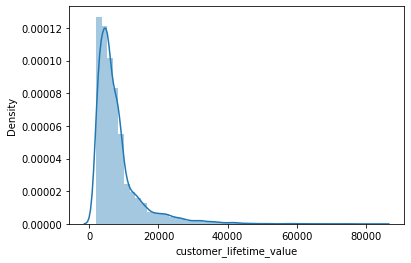

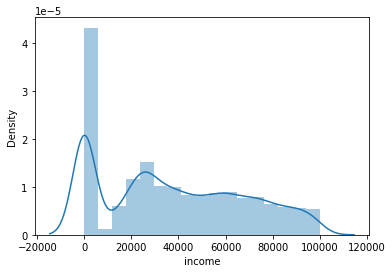

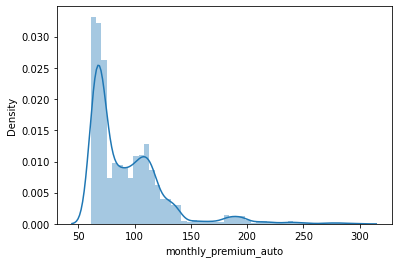

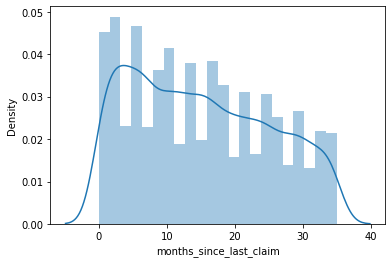

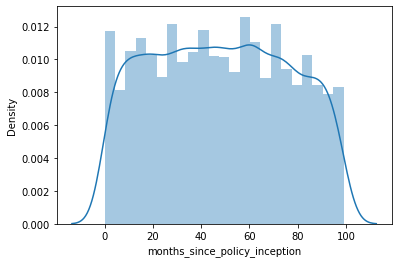

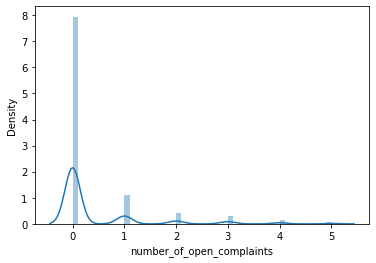

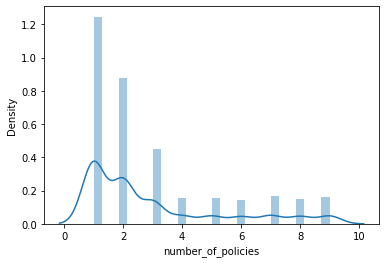

In [20]:
for column in data.select_dtypes(np.number).columns:
    sns.distplot(data[column])
    plt.show()

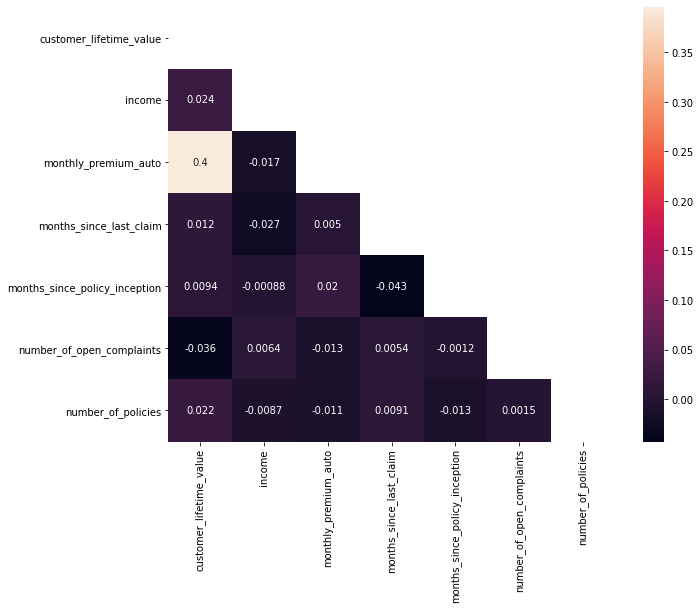

In [21]:
#check the correlation
mask = np.zeros_like(data.corr())

mask[np.triu_indices_from(mask)] = True # optional, to hide repeat half of the matrix

fig, ax = plt.subplots(figsize=(10, 8))
ax = sns.heatmap(data.corr(), mask=mask, annot=True)
plt.show()
#some numer are out because that have the highest correlation with target

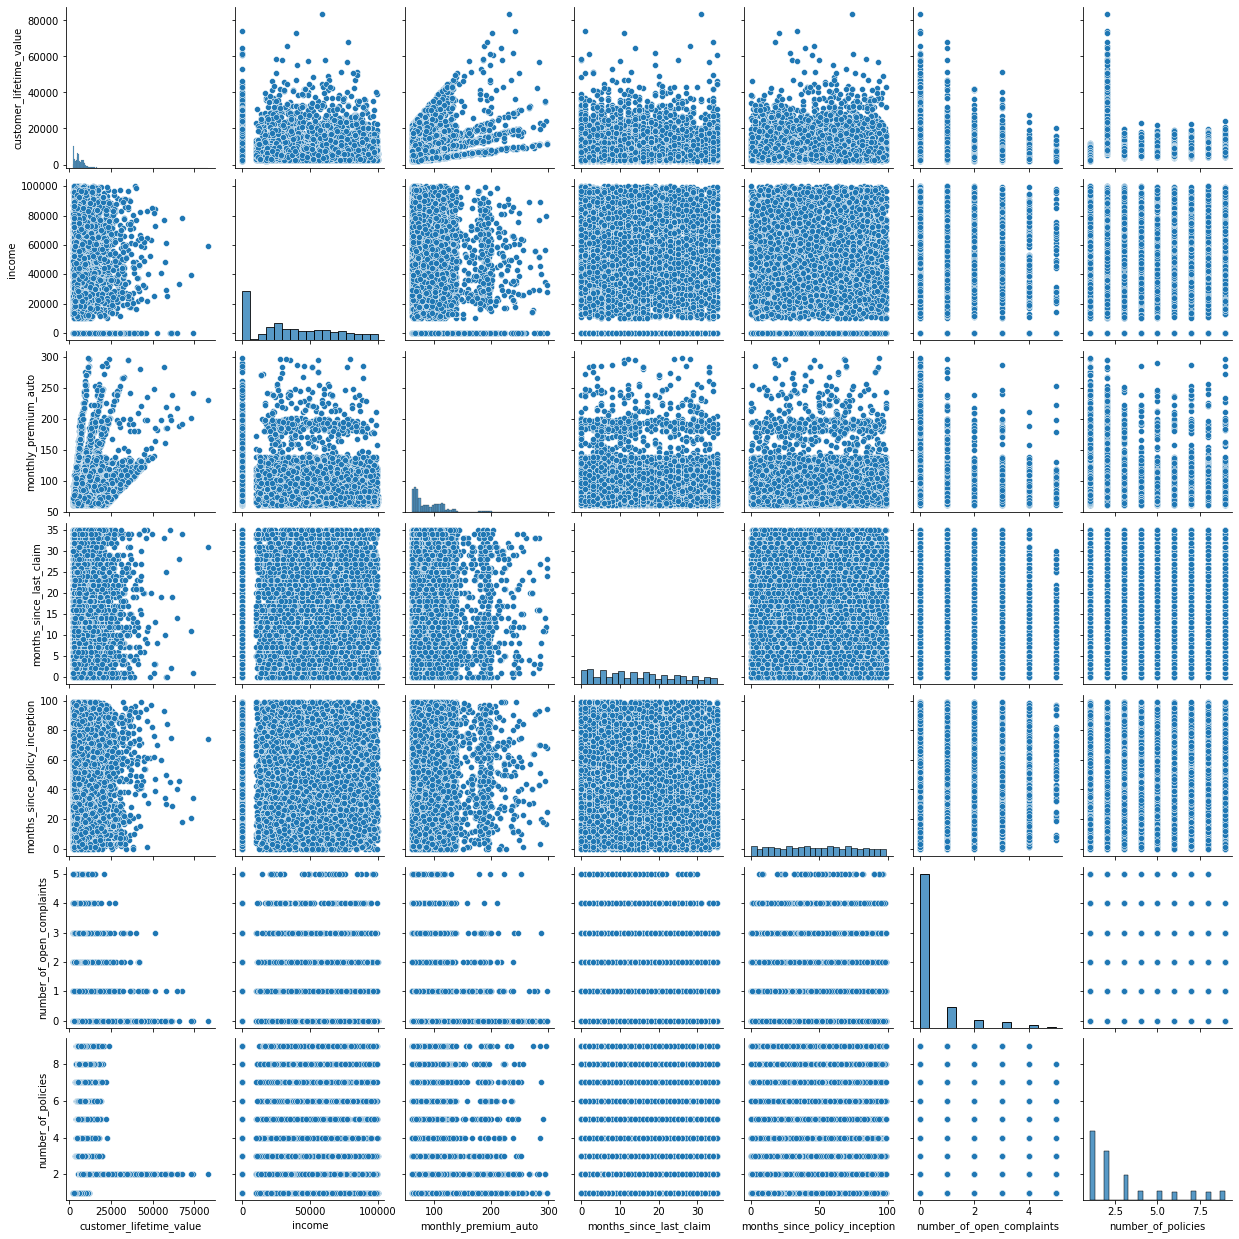

In [22]:
# covariance visualization
sns.pairplot(data)

In [23]:
#Procesing data
def boxcox_transform(data):
    numeric_cols = data.select_dtypes(np.number).columns
    _ci = {column: None for column in numeric_cols}
    for column in numeric_cols:
        # since i know any columns should take negative numbers, to avoid -inf in df
        data[column] = np.where(data[column]<=0, np.NAN, data[column]) 
        data[column] = data[column].fillna(data[column].mean())
        transformed_data, ci = stats.boxcox(data[column])
        data[column] = transformed_data
        _ci[column] = [ci] 
    return data, _ci

In [24]:
data, _ci = boxcox_transform(data)
data

customer       state  customer_lifetime_value response  \
total_claim_amount                                                          
384.811147          BU79786  Washington                 2.703839       No   
1131.464935         QZ44356     Arizona                 2.754926       No   
566.472247          AI49188      Nevada                 2.780772       No   
529.881344          WW63253  California                 2.759125       No   
138.130879          HB64268  Washington                 2.704995       No   
...                     ...         ...                      ...      ...   
198.234764          LA72316  California                 2.801170       No   
379.200000          PK87824  California                 2.711030      Yes   
790.784983          TD14365  California                 2.762062       No   
691.200000          UP19263  California                 2.758397       No   
369.600000          Y167826  California                 2.700165       No   

                    coverage education effective_to_date employmentstatus  \
total_claim_amount                                                          
384.811147             Basic  Bachelor        2011-02-24         Employed   
1131.464935         Extended  Bachelor        2011-01-31       Unemployed   
566.472247           Premium  Bachelor        2011-02-19         Employed   
529.881344             Basic  Bachelor        2011-01-20       Unemployed   
138.130879             Basic  Bachelor        2011-02-03         Employed   
...                      ...       ...               ...              ...   
198.234764             Basic  Bachelor        2011-02-10         Employed   
379.200000          Extended   College        2011-02-12         Employed   
790.784983          Extended  Bachelor        2011-02-06       Unemployed   
691.200000          Extended   College        2011-02-03         Employed   
369.600000          Extended   College        2011-02-14       Unemployed   

                   gender       income location_code marital_status  \
total_claim_amount                                                    
384.811147              F  1247.937066      Suburban        Married   
1131.464935             F  1167.961720      Suburban         Single   
566.472247              F  1144.063081      Suburban        Married   
529.881344              M  1167.961720      Suburban        Married   
138.130879              M  1072.375744         Rural         Single   
...                   ...          ...           ...            ...   
198.234764              M  1448.531450         Urban        Married   
379.200000              F   697.790558      Suburban       Divorced   
790.784983              M  1167.961720      Suburban         Single   
691.200000              M   704.383672      Suburban        Married   
369.600000              M  1167.961720      Suburban         Single   

                    monthly_premium_auto  months_since_last_claim  \
total_claim_amount                                                  
384.811147                      0.685347                10.876059   
1131.464935                     0.685871                 5.808248   
566.472247                      0.686039                 7.347815   
529.881344                      0.686018                 7.347815   
138.130879                      0.685461                 5.471294   
...                                  ...                      ...   
198.234764                      0.685461                 7.347815   
379.200000                      0.685606                 6.134207   
790.784983                      0.685725                 4.379465   
691.200000                      0.685898                11.319628   
369.600000                      0.685560                 1.526503   

                    months_since_policy_inception  number_of_open_complaints  \
total_claim_amount                                                             
384.811147                       

In [25]:
_ci

{'customer_lifetime_value': [-0.3460077279198611],
 'income': [0.606136983521106],
 'monthly_premium_auto': [-1.4560475713521648],
 'months_since_last_claim': [0.5692435567708527],
 'months_since_policy_inception': [0.7136590106846658],
 'number_of_open_complaints': [0.12272161798485684],
 'number_of_policies': [-0.39015686286007867]}

In [26]:
#removing outliers
def remove_outliers(data, threshold=1.5, in_columns=data.select_dtypes(np.number).columns, skip_columns=[]):
    for column in in_columns:
        if column not in skip_columns:
            upper = np.percentile(data[column],75)
            lower = np.percentile(data[column],25)
            iqr = upper - lower
            upper_limit = upper + (threshold * iqr)
            lower_limit = lower - (threshold * iqr)
            data = data[(data[column]>lower_limit) & (data[column]<upper_limit)]
    return data

In [27]:
data1 = data.copy()

data1 = remove_outliers(data1, threshold=1.5, skip_columns=['number_of_open_complaints']) 
#we reduce the number of open complaint data
data1

customer       state  customer_lifetime_value response  \
total_claim_amount                                                          
384.811147          BU79786  Washington                 2.703839       No   
1131.464935         QZ44356     Arizona                 2.754926       No   
566.472247          AI49188      Nevada                 2.780772       No   
529.881344          WW63253  California                 2.759125       No   
138.130879          HB64268  Washington                 2.704995       No   
...                     ...         ...                      ...      ...   
198.234764          LA72316  California                 2.801170       No   
379.200000          PK87824  California                 2.711030      Yes   
790.784983          TD14365  California                 2.762062       No   
691.200000          UP19263  California                 2.758397       No   
369.600000          Y167826  California                 2.700165       No   

                    coverage education effective_to_date employmentstatus  \
total_claim_amount                                                          
384.811147             Basic  Bachelor        2011-02-24         Employed   
1131.464935         Extended  Bachelor        2011-01-31       Unemployed   
566.472247           Premium  Bachelor        2011-02-19         Employed   
529.881344             Basic  Bachelor        2011-01-20       Unemployed   
138.130879             Basic  Bachelor        2011-02-03         Employed   
...                      ...       ...               ...              ...   
198.234764             Basic  Bachelor        2011-02-10         Employed   
379.200000          Extended   College        2011-02-12         Employed   
790.784983          Extended  Bachelor        2011-02-06       Unemployed   
691.200000          Extended   College        2011-02-03         Employed   
369.600000          Extended   College        2011-02-14       Unemployed   

                   gender       income location_code marital_status  \
total_claim_amount                                                    
384.811147              F  1247.937066      Suburban        Married   
1131.464935             F  1167.961720      Suburban         Single   
566.472247              F  1144.063081      Suburban        Married   
529.881344              M  1167.961720      Suburban        Married   
138.130879              M  1072.375744         Rural         Single   
...                   ...          ...           ...            ...   
198.234764              M  1448.531450         Urban        Married   
379.200000              F   697.790558      Suburban       Divorced   
790.784983              M  1167.961720      Suburban         Single   
691.200000              M   704.383672      Suburban        Married   
369.600000              M  1167.961720      Suburban         Single   

                    monthly_premium_auto  months_since_last_claim  \
total_claim_amount                                                  
384.811147                      0.685347                10.876059   
1131.464935                     0.685871                 5.808248   
566.472247                      0.686039                 7.347815   
529.881344                      0.686018                 7.347815   
138.130879                      0.685461                 5.471294   
...                                  ...                      ...   
198.234764                      0.685461                 7.347815   
379.200000                      0.685606                 6.134207   
790.784983                      0.685725                 4.379465   
691.200000                      0.685898                11.319628   
369.600000                      0.685560                 1.526503   

                    months_since_policy_inception  number_of_open_complaints  \
total_claim_amount                                                             
384.811147                       

In [28]:
data2 = remove_outliers(data1, threshold=1.5, in_columns=['customer_lifetime_value', 'monthly_premium_auto'])
# now filter the outliers on the more important columns with a tighter threshold
data2

customer       state  customer_lifetime_value response  \
total_claim_amount                                                          
384.811147          BU79786  Washington                 2.703839       No   
1131.464935         QZ44356     Arizona                 2.754926       No   
566.472247          AI49188      Nevada                 2.780772       No   
529.881344          WW63253  California                 2.759125       No   
138.130879          HB64268  Washington                 2.704995       No   
...                     ...         ...                      ...      ...   
198.234764          LA72316  California                 2.801170       No   
379.200000          PK87824  California                 2.711030      Yes   
790.784983          TD14365  California                 2.762062       No   
691.200000          UP19263  California                 2.758397       No   
369.600000          Y167826  California                 2.700165       No   

                    coverage education effective_to_date employmentstatus  \
total_claim_amount                                                          
384.811147             Basic  Bachelor        2011-02-24         Employed   
1131.464935         Extended  Bachelor        2011-01-31       Unemployed   
566.472247           Premium  Bachelor        2011-02-19         Employed   
529.881344             Basic  Bachelor        2011-01-20       Unemployed   
138.130879             Basic  Bachelor        2011-02-03         Employed   
...                      ...       ...               ...              ...   
198.234764             Basic  Bachelor        2011-02-10         Employed   
379.200000          Extended   College        2011-02-12         Employed   
790.784983          Extended  Bachelor        2011-02-06       Unemployed   
691.200000          Extended   College        2011-02-03         Employed   
369.600000          Extended   College        2011-02-14       Unemployed   

                   gender       income location_code marital_status  \
total_claim_amount                                                    
384.811147              F  1247.937066      Suburban        Married   
1131.464935             F  1167.961720      Suburban         Single   
566.472247              F  1144.063081      Suburban        Married   
529.881344              M  1167.961720      Suburban        Married   
138.130879              M  1072.375744         Rural         Single   
...                   ...          ...           ...            ...   
198.234764              M  1448.531450         Urban        Married   
379.200000              F   697.790558      Suburban       Divorced   
790.784983              M  1167.961720      Suburban         Single   
691.200000              M   704.383672      Suburban        Married   
369.600000              M  1167.961720      Suburban         Single   

                    monthly_premium_auto  months_since_last_claim  \
total_claim_amount                                                  
384.811147                      0.685347                10.876059   
1131.464935                     0.685871                 5.808248   
566.472247                      0.686039                 7.347815   
529.881344                      0.686018                 7.347815   
138.130879                      0.685461                 5.471294   
...                                  ...                      ...   
198.234764                      0.685461                 7.347815   
379.200000                      0.685606                 6.134207   
790.784983                      0.685725                 4.379465   
691.200000                      0.685898                11.319628   
369.600000                      0.685560                 1.526503   

                    months_since_policy_inception  number_of_open_complaints  \
total_claim_amount                                                             
384.811147                       

In [29]:
#Processing Data
y = data['customer_lifetime_value']
X = data.drop(['customer_lifetime_value'], axis=1)

In [30]:
X_num = X.select_dtypes(include = np.number)
X_cat = X.select_dtypes(include = np.object)

In [31]:
import pickle

# Normalizing data
transformer = Normalizer() 
transformer.fit(X_num) 


with open('transformer.pkl', 'wb') as file:
    pickle.dump(transformer, file)

with open('transformer.pkl', 'rb') as file:
    transformer = pickle.load(file)

x_normalized = transformer.transform(X_num)
#pd.DataFrame(x_normalized)
x_normalized.shape

(9134, 6)

In [32]:
X_num

income  monthly_premium_auto  \
total_claim_amount                                      
384.811147          1247.937066              0.685347   
1131.464935         1167.961720              0.685871   
566.472247          1144.063081              0.686039   
529.881344          1167.961720              0.686018   
138.130879          1072.375744              0.685461   
...                         ...                   ...   
198.234764          1448.531450              0.685461   
379.200000           697.790558              0.685606   
790.784983          1167.961720              0.685725   
691.200000           704.383672              0.685898   
369.600000          1167.961720              0.685560   

                    months_since_last_claim  months_since_policy_inception  \
total_claim_amount                                                           
384.811147                        10.876059                       3.017887   
1131.464935                        5.808248                      18.780377   
566.472247                         7.347815                      17.389171   
529.881344                         7.347815                      26.160800   
138.130879                         5.471294                      19.461641   
...                                     ...                            ...   
198.234764                         7.347815                      33.090025   
379.200000                         6.134207                      13.709541   
790.784983                         4.379465                      17.034934   
691.200000                        11.319628                       1.667871   
369.600000                         1.526503                      33.366155   

                    number_of_open_complaints  number_of_policies  
total_claim_amount                                                 
384.811147                           0.648045            0.000000  
1131.464935                          0.648045            1.424359  
566.472247                           0.648045            0.607328  
529.881344                           0.648045            1.363462  
138.130879                           0.648045            0.000000  
...                                       ...                 ...  
198.234764                           0.648045            0.607328  
379.200000                           0.648045            0.000000  
790.784983                           1.176115            0.607328  
691.200000                           0.648045            0.893486  
369.600000                           0.648045            0.000000  

[9134 rows x 6 columns]

In [33]:
pd.DataFrame(x_normalized)

0         1         2         3         4         5
0     0.999959  0.000549  0.008715  0.002418  0.000519  0.000000
1     0.999857  0.000587  0.004972  0.016077  0.000555  0.001219
2     0.999863  0.000600  0.006422  0.015197  0.000566  0.000531
3     0.999728  0.000587  0.006289  0.022393  0.000555  0.001167
4     0.999822  0.000639  0.005101  0.018145  0.000604  0.000000
...        ...       ...       ...       ...       ...       ...
9129  0.999726  0.000473  0.005071  0.022838  0.000447  0.000419
9130  0.999768  0.000982  0.008789  0.019643  0.000928  0.000000
9131  0.999886  0.000587  0.003749  0.014584  0.001007  0.000520
9132  0.999866  0.000974  0.016068  0.002368  0.000920  0.001268
9133  0.999591  0.000587  0.001306  0.028556  0.000555  0.000000

[9134 rows x 6 columns]

In [34]:
# using standard scaler
transformer = StandardScaler()

transformer.fit(X_num)

x_standardized = transformer.transform(X_num)
x_standardized

array([[ 0.35130554, -0.85061054,  1.48336032, -1.77878773,  0.11248968,
        -1.16706791],
       [ 0.08566055,  0.43357413, -0.11348358, -0.13305694,  0.11248968,
         1.54824637],
       [ 0.00627917,  0.84693644,  0.37162699, -0.27830998,  0.11248968,
        -0.00929297],
       ...,
       [ 0.08566055,  0.07713899, -0.56368651, -0.31529527,  2.0447642 ,
        -0.00929297],
       [-1.45415381,  0.50175583,  1.62312692, -1.9197403 ,  0.11248968,
         0.53622145],
       [ 0.08566055, -0.32763553, -1.46264173,  1.38981576,  0.11248968,
        -1.16706791]])

In [35]:
data = pd.get_dummies(data2, drop_first=True) # now enconding categorical but i'm not sure
data

customer_lifetime_value effective_to_date       income  \
total_claim_amount                                                           
384.811147                         2.703839        2011-02-24  1247.937066   
1131.464935                        2.754926        2011-01-31  1167.961720   
566.472247                         2.780772        2011-02-19  1144.063081   
529.881344                         2.759125        2011-01-20  1167.961720   
138.130879                         2.704995        2011-02-03  1072.375744   
...                                     ...               ...          ...   
198.234764                         2.801170        2011-02-10  1448.531450   
379.200000                         2.711030        2011-02-12   697.790558   
790.784983                         2.762062        2011-02-06  1167.961720   
691.200000                         2.758397        2011-02-03   704.383672   
369.600000                         2.700165        2011-02-14  1167.961720   

                    monthly_premium_auto  months_since_last_claim  \
total_claim_amount                                                  
384.811147                      0.685347                10.876059   
1131.464935                     0.685871                 5.808248   
566.472247                      0.686039                 7.347815   
529.881344                      0.686018                 7.347815   
138.130879                      0.685461                 5.471294   
...                                  ...                      ...   
198.234764                      0.685461                 7.347815   
379.200000                      0.685606                 6.134207   
790.784983                      0.685725                 4.379465   
691.200000                      0.685898                11.319628   
369.600000                      0.685560                 1.526503   

                    months_since_policy_inception  number_of_open_complaints  \
total_claim_amount                                                             
384.811147                               3.017887                   0.648045   
1131.464935                             18.780377                   0.648045   
566.472247                              17.389171                   0.648045   
529.881344                              26.160800                   0.648045   
138.130879                              19.461641                   0.648045   
...                                           ...                        ...   
198.234764                              33.090025                   0.648045   
379.200000                              13.709541                   0.648045   
790.784983                              17.034934                   1.176115   
691.200000                               1.667871                   0.648045   
369.600000                              33.366155                   0.648045   

                    number_of_policies  customer_AA11235  customer_AA16582  \
total_claim_amount                                                           
384.811147                    0.000000                 0                 0   
1131.464935                   1.424359                 0                 0   
566.472247                    0.607328                 0                 0   
529.881344                    1.363462                 0                 0   
138.130879                    0.000000                 0                 0   
...                                ...               ...               ...   
198.234764                    0.607328                 0                 0   
379.200000                    0.000000                 0                 0   
790.784983                    0.607328                 0                 0   
691.200000                    0.893486                 0                 0   
369.600000                    0.000000                 0                 0   

                    customer_AA30683  customer_AA34

In [38]:
encoder = OneHotEncoder(handle_unknown='error', drop='first')
encoder.fit(X_cat)

encoder = encoder.transform(X_cat).toarray()
encoder

array([[0., 0., 0., ..., 1., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 1., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 1., 0.]])

In [39]:
encoder.shape

(9134, 9176)

In [40]:
x_normalized.shape, encoder.shape

((9134, 6), (9134, 9176))

In [41]:
#Linear Regression
#Train-test split
X = np.concatenate([x_normalized, encoder], axis=1)

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)

In [43]:
#Apply linear regression
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [44]:
#6. model validation
predictions  = model.predict(X_test)
predictions.shape

(2741,)

In [45]:
predictions

array([2.7596512 , 2.73268398, 2.74048925, ..., 2.76376585, 2.73146628,
       2.76582063])

In [46]:
#Model Validation
#Get R2 from the model
r2 = r2_score(y_test, predictions)
print(r2)

0.22256763631740284


In [47]:
#Get MSE from the model
mse = mean_squared_error(y_test, predictions)
print(mse)

0.0007604298953480311


In [50]:
#Get RMSE from the model
rmse = math.sqrt(mse)
print(rmse)

0.0275758933735252


In [51]:
model.coef_

array([-0.04975289, -0.00051836,  0.00432483, ...,  0.00094191,
        0.00299848,  0.00282855])

In [53]:
# MAE and MSE are log transformed
# have to inverse transform
from scipy.special import inv_boxcox

predictions = inv_boxcox(predictions, _ci['customer_lifetime_value'])

In [54]:
results = pd.DataFrame()
results['true'] = inv_boxcox(y_test, _ci['customer_lifetime_value'])
results['pred'] = predictions
results['resid'] = results.apply(lambda x: abs(x['true'] - x['pred']), axis=1)
results

true         pred         resid
total_claim_amount                                         
218.598065           4222.631209  7735.375552   3512.744343
447.793440           5514.344018  4494.046992   1020.297026
451.200000           3808.122147  5205.533407   1397.411260
355.641958           7914.823110  6655.765850   1259.057260
470.097411           7931.722181  4988.213132   2943.509049
...                          ...          ...           ...
518.400000           4335.353131  6710.422366   2375.069235
650.521790           9031.214859  7698.049792   1333.165067
652.800000           5522.524223  8486.077293   2963.553070
150.878447           5093.479191  4395.073436    698.405755
452.616872          29194.366390  8897.910698  20296.455692

[2741 rows x 3 columns]

In [55]:
#present results
results.describe()

true          pred         resid
count   2741.000000   2741.000000   2741.000000
mean    8072.567732   6240.771890   3782.790130
std     7215.144206   2311.914257   5760.289039
min     1898.683686   3637.827251      1.946159
25%     3861.486269   4734.979907   1000.324166
50%     5714.232848   5453.869514   2138.718733
75%     8923.154803   7019.872650   3480.639277
max    73225.956520  24089.165702  55849.120802